In [15]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [16]:
data = pd.read_csv('fifa_players.csv')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [18]:
data = data.drop(columns = ["release_clause_euro", "national_team", "national_rating", "national_team_position", 
                           "national_jersey_number", "body_type", "international_reputation(1-5)", "weak_foot(1-5)",
                           "skill_moves(1-5)", "potential", "full_name", "birth_date"], axis = 1)
data = data.dropna()
data.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,value_euro,wage_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,110500000.0,565000.0,Left,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,69500000.0,205000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,73000000.0,255000.0,Right,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,62000000.0,165000.0,Right,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,60000000.0,135000.0,Right,...,15,87,88,24,49,33,80,91,88,87


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height_cm'}>,
        <Axes: title={'center': 'weight_kgs'}>,
        <Axes: title={'center': 'overall_rating'}>,
        <Axes: title={'center': 'value_euro'}>,
        <Axes: title={'center': 'wage_euro'}>],
       [<Axes: title={'center': 'crossing'}>,
        <Axes: title={'center': 'finishing'}>,
        <Axes: title={'center': 'heading_accuracy'}>,
        <Axes: title={'center': 'short_passing'}>,
        <Axes: title={'center': 'volleys'}>,
        <Axes: title={'center': 'dribbling'}>],
       [<Axes: title={'center': 'curve'}>,
        <Axes: title={'center': 'freekick_accuracy'}>,
        <Axes: title={'center': 'long_passing'}>,
        <Axes: title={'center': 'ball_control'}>,
        <Axes: title={'center': 'acceleration'}>,
        <Axes: title={'center': 'sprint_speed'}>],
       [<Axes: title={'center': 'agility'}>,
        <Axes: title={'center': 'reactions'}>,
        <Axes: title={'center': 'b

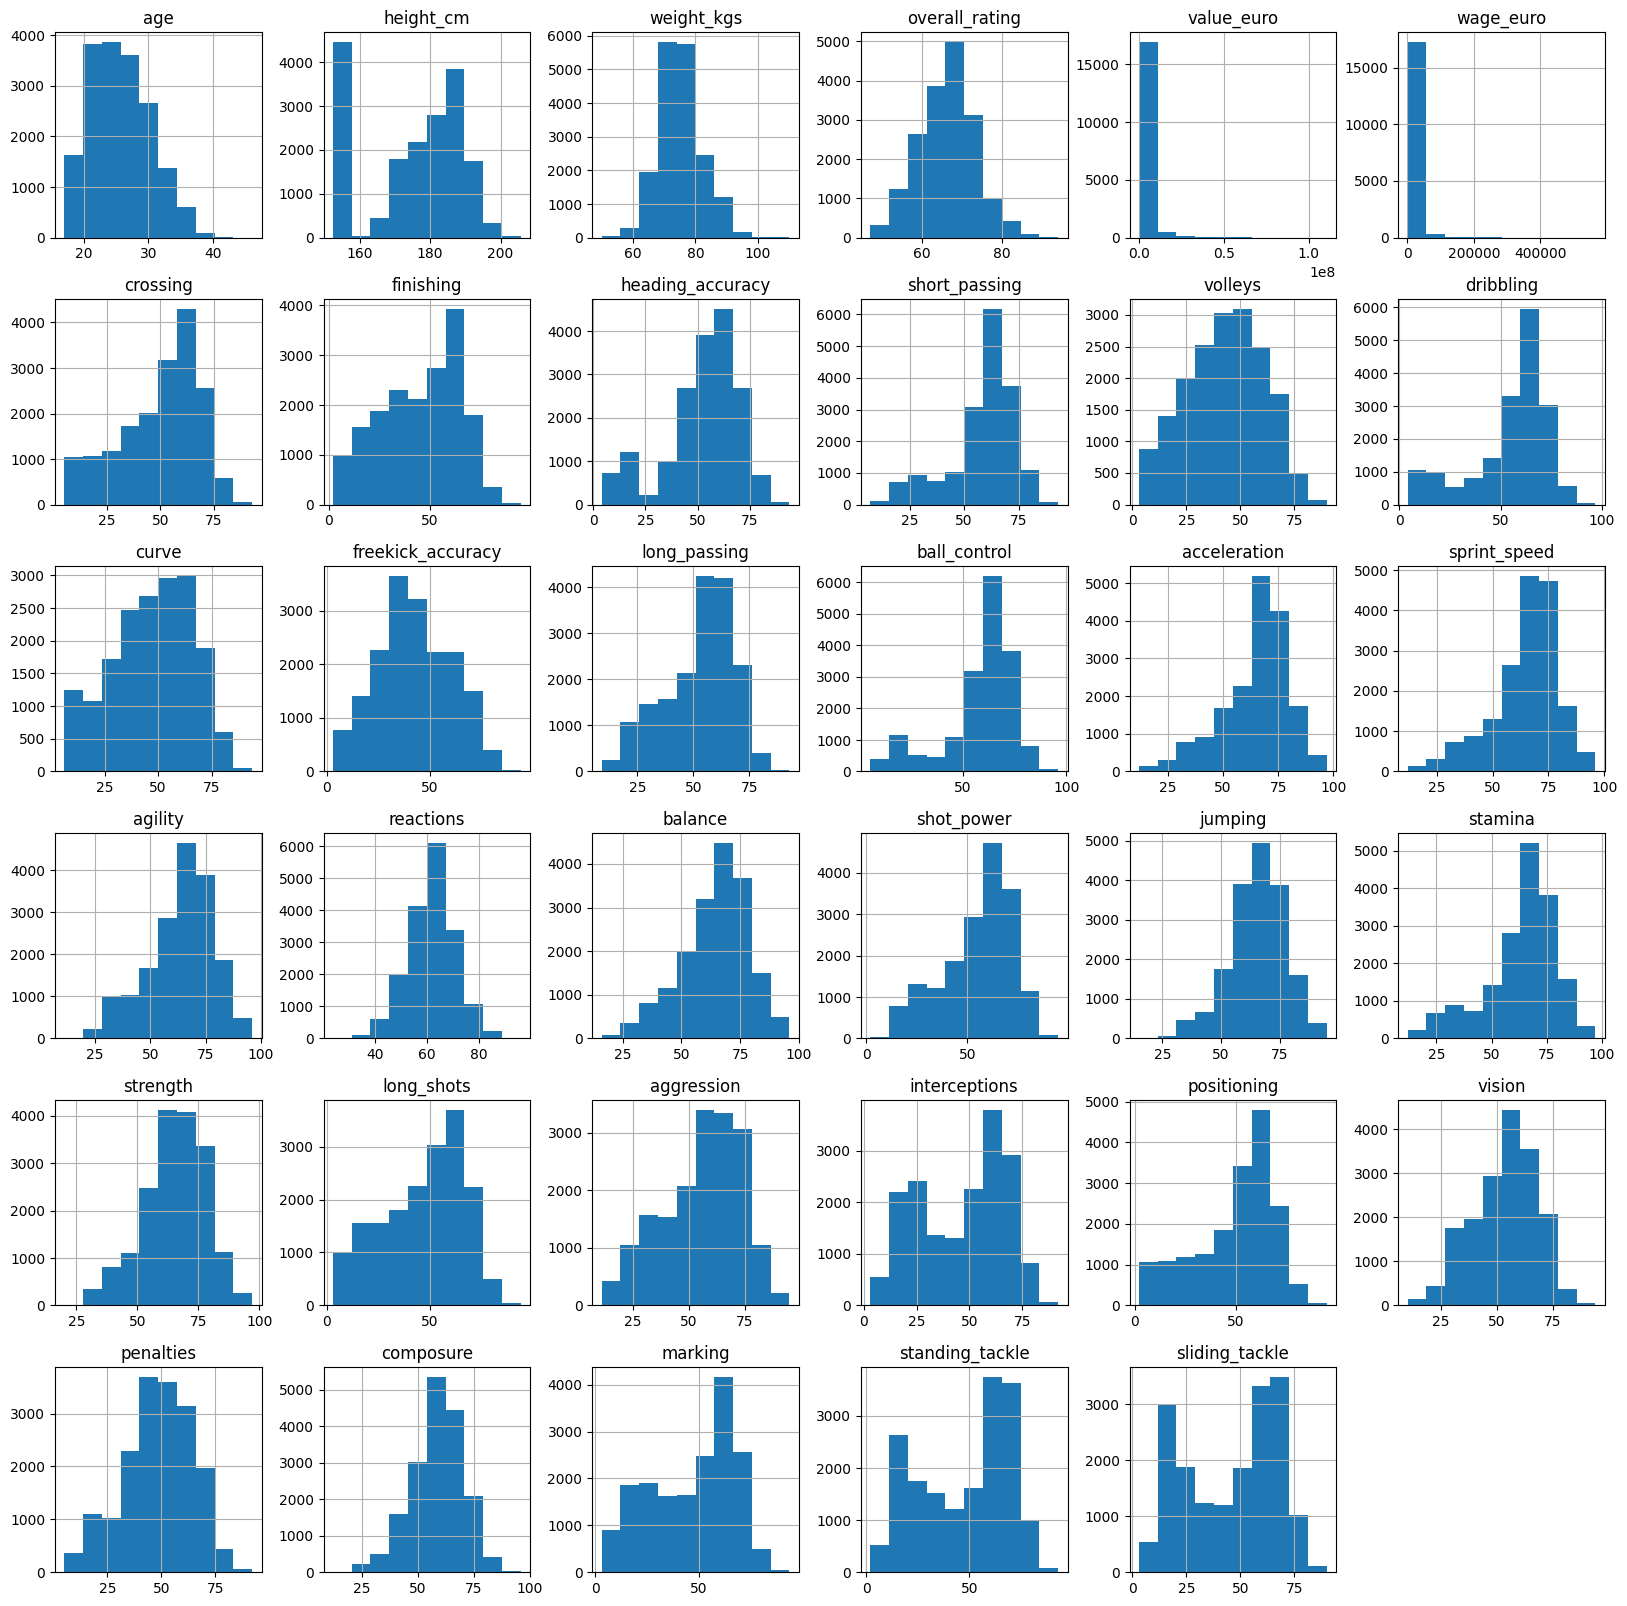

In [19]:
data.hist(figsize = (20, 20))

In [20]:
data['physical'] = (data["strength"] + data["sprint_speed"] + data["agility"] + data["reactions"] + data["stamina"] +
                   data["jumping"] + data["balance"] + data["acceleration"])/8

data['defensive_skill'] = (data["sliding_tackle"] + data["standing_tackle"] + data["interceptions"] + data["marking"] +
                          data["positioning"] + data["aggression"])/6

data["football_skills"] = (data["ball_control"] + data["short_passing"] + data["long_passing"] + data["composure"] +
                          data["vision"] + data["dribbling"])/6

data["offensive_skills"] = (data["crossing"] + data["finishing"] + data["long_shots"] + data["volleys"] +
                           data["heading_accuracy"])/5

Text(0.5, 1.0, 'Daatele de pe coloana value_euro')

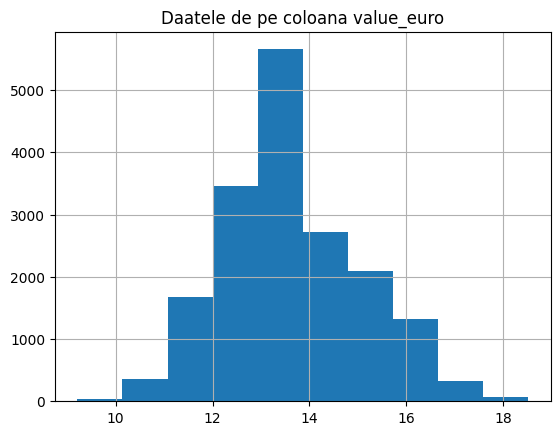

In [21]:
data["value_euro"] = np.log(data["value_euro"])
data["value_euro"].hist()
plt.title("Daatele de pe coloana value_euro") 


In [22]:
y = data["value_euro"]
X = pd.DataFrame(data = data, columns = ('offensive_skills', 'football_skills', 'defensive_skill', 'physical','age', 
                                        'height_cm', 'weight_kgs', 'freekick_accuracy', 
                                        'penalties'))
X.head()

,offensive_skills,football_skills,defensive_skill,physical,age,height_cm,weight_kgs,freekick_accuracy,penalties
0,86.2,94.000000,41.833333,83.250,31,170.18,72.1,94,75
1,78.0,89.000000,54.000000,74.750,27,154.94,76.2,87,67
2,79.4,88.000000,70.166667,79.000,25,190.50,83.9,82,82
3,75.4,86.000000,40.000000,77.750,27,162.56,59.0,77,61
4,32.8,64.833333,77.500000,70.875,27,187.96,88.9,28,33


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11, test_size = 0.25)

In [24]:
model2 = LinearRegression().fit(X_train, y_train)
y_pred_lin_reg = model2.predict(X_test)
accuracy_lin_reg = model2.score(X_test, y_test)

In [25]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [26]:
model3 = LinearRegression().fit(X_train_pca, y_train)
model3.fit(X_train_pca, y_train)
y_pred_pca = model3.predict(X_test_pca)
accuracy = model3.score(X_test_pca, y_test)

In [27]:
print("Linear regression accuracy: ", accuracy_lin_reg)
print("PCA accuracy: ", accuracy)

Linear regression accuracy:  0.4940719891592822
PCA accuracy:  0.28156552218249375


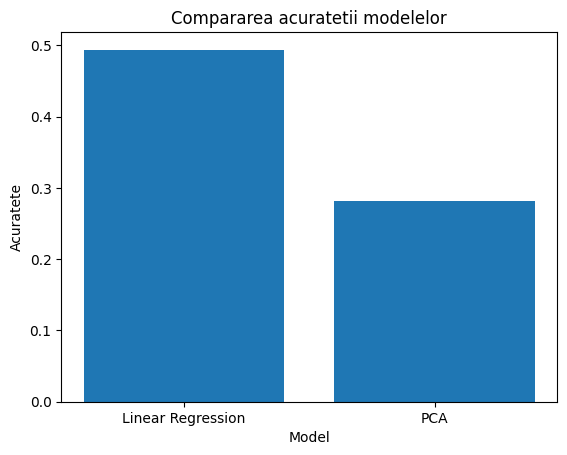

In [28]:
accuracies = [accuracy_lin_reg, accuracy]

x_labels = ["Linear Regression", "PCA"]
y_label = "Acuratete"

plt.bar(x_labels, accuracies)

plt.title("Compararea acuratetii modelelor")
plt.xlabel("Model")
plt.ylabel(y_label)

plt.show()
